In [1]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\Social Media Engagement Dataset.csv")

In [3]:
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [4]:

print("Data Shape: ", df.shape)


Data Shape:  (12000, 28)


In [5]:

print("DATA information")
print(df.info())


DATA information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emoti

In [6]:
print("Total Null values")
print(df.isnull().sum())


Total Null values
post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64


In [7]:
mode_mention = df['mentions'].mode()[0]
df['mentions'].fillna(mode_mention, inplace=True)


In [56]:
df.isnull().sum()

post_id                    0
timestamp                  0
day_of_week                0
platform                   0
user_id                    0
location                   0
language                   0
text_content               0
hashtags                   0
mentions                   0
keywords                   0
topic_category             0
sentiment_score            0
sentiment_label            0
emotion_type               0
toxicity_score             0
likes_count                0
shares_count               0
comments_count             0
impressions                0
engagement_rate            0
brand_name                 0
product_name               0
campaign_name              0
campaign_phase             0
user_past_sentiment_avg    0
user_engagement_growth     0
buzz_change_rate           0
month                      0
hour                       0
dtype: int64

In [8]:

print("dublicated Row sum:",df.duplicated().sum())

dublicated Row sum: 0


In [9]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.head())


   sentiment_score  toxicity_score  likes_count  shares_count  comments_count  \
0           0.9826          0.0376         1264          1704             701   
1          -0.3793          0.9715          522          1803             359   
2          -0.3596          0.5124         2689           705             643   
3          -0.7282          0.4002         1827           262             743   
4           0.5460          0.0862         2005          1443             703   

   impressions  engagement_rate  user_past_sentiment_avg  \
0        18991          0.19319                   0.0953   
1        52764          0.05086                   0.1369   
2         8887          0.45425                   0.2855   
3         6696          0.42293                  -0.2094   
4        47315          0.08773                   0.6867   

   user_engagement_growth  buzz_change_rate  
0                 -0.3672              19.1  
1                 -0.4510             -42.6  
2             

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(num_cols)


['sentiment_score', 'toxicity_score', 'likes_count', 'shares_count', 'comments_count', 'impressions', 'engagement_rate', 'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate']


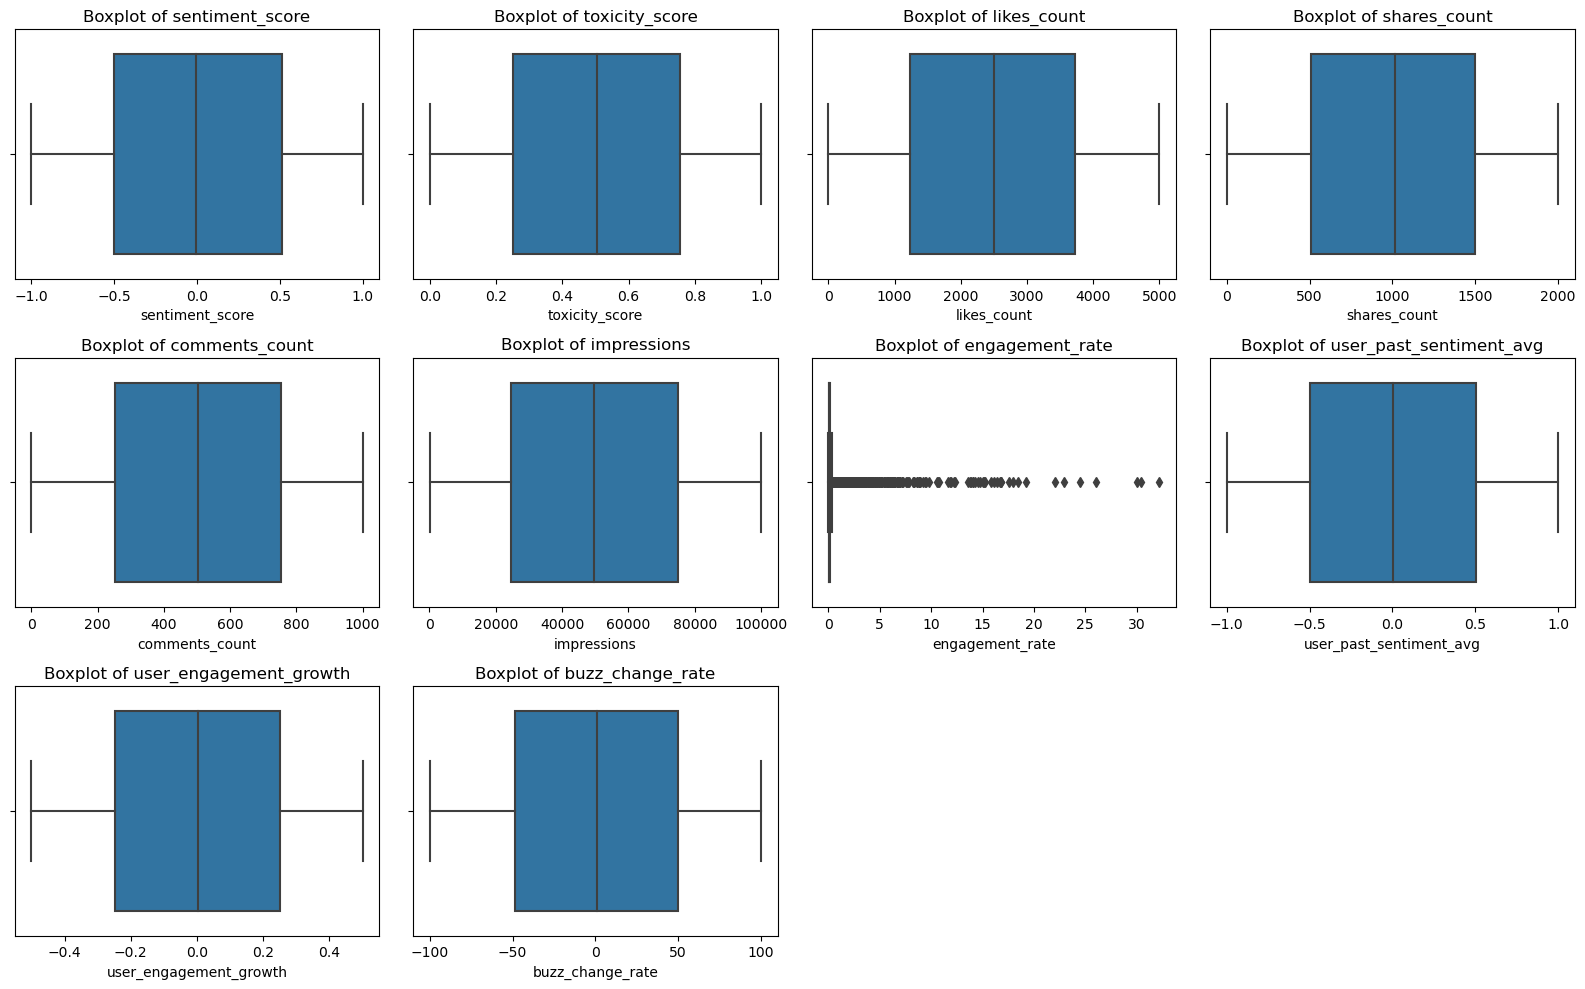

In [11]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [12]:

numerical_df = df.select_dtypes(include=['number'])

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to all numerical columns
for col in numerical_df.columns:
    outliers = detect_outliers_iqr(numerical_df, col)
    print(f"{col}: {len(outliers)} outliers")


sentiment_score: 0 outliers
toxicity_score: 0 outliers
likes_count: 0 outliers
shares_count: 0 outliers
comments_count: 0 outliers
impressions: 0 outliers
engagement_rate: 1494 outliers
user_past_sentiment_avg: 0 outliers
user_engagement_growth: 0 outliers
buzz_change_rate: 0 outliers


In [13]:
Q1 = df['engagement_rate'].quantile(0.25)
Q3 = df['engagement_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['engagement_rate'] >= lower_bound) & (df['engagement_rate'] <= upper_bound)]
print("New shape after outlier removal:", df_no_outliers.shape)


New shape after outlier removal: (10506, 28)


In [14]:

Q1 = df_no_outliers['engagement_rate'].quantile(0.25)
Q3 = df_no_outliers['engagement_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


remaining_outliers = df_no_outliers[
    (df_no_outliers['engagement_rate'] < lower_bound) | 
    (df_no_outliers['engagement_rate'] > upper_bound) ]

print(f"Remaining outliers in engagement_rate: {remaining_outliers.shape[0]}")


Remaining outliers in engagement_rate: 691


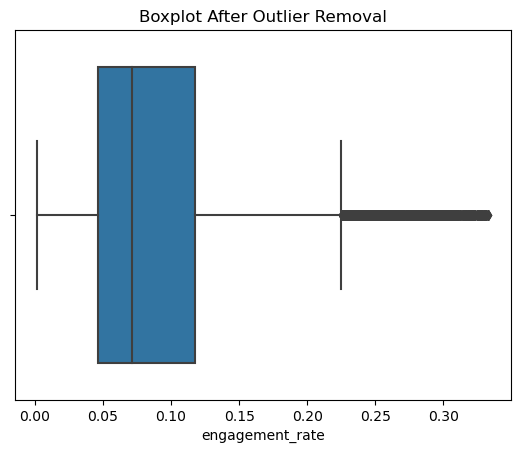

In [15]:
sns.boxplot(x=df_no_outliers['engagement_rate'])
plt.title('Boxplot After Outlier Removal')
plt.show()


 # EDA

## Univariate Analysis

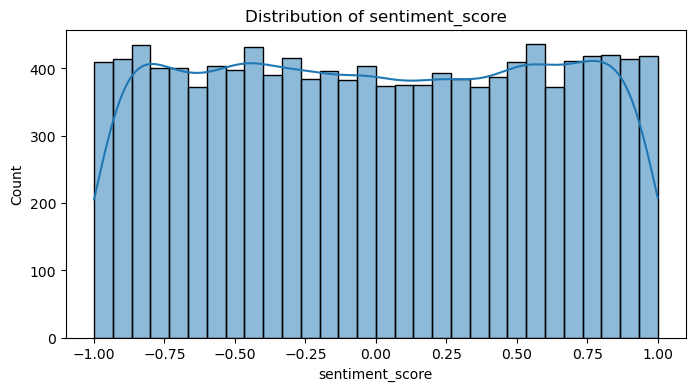

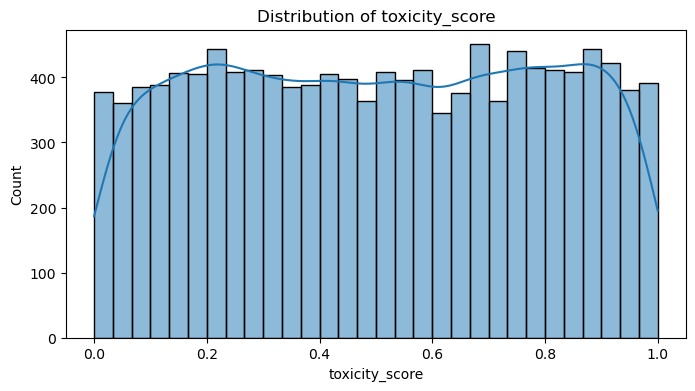

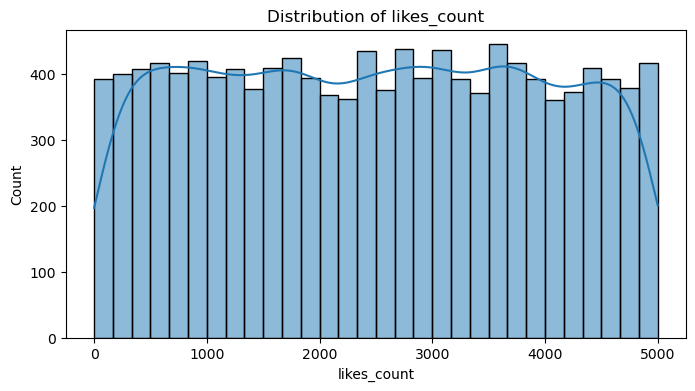

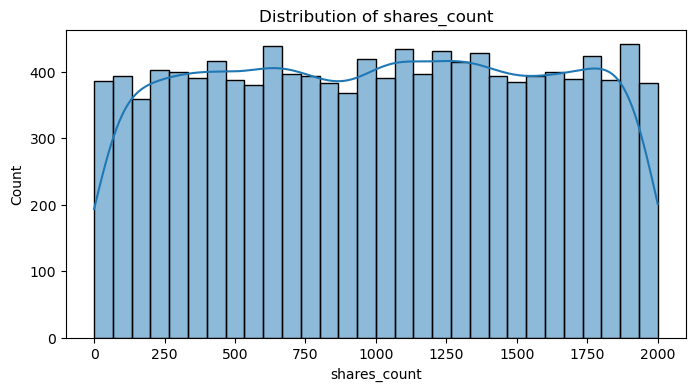

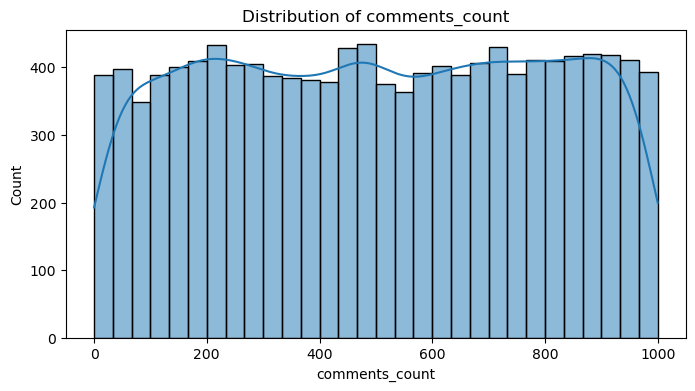

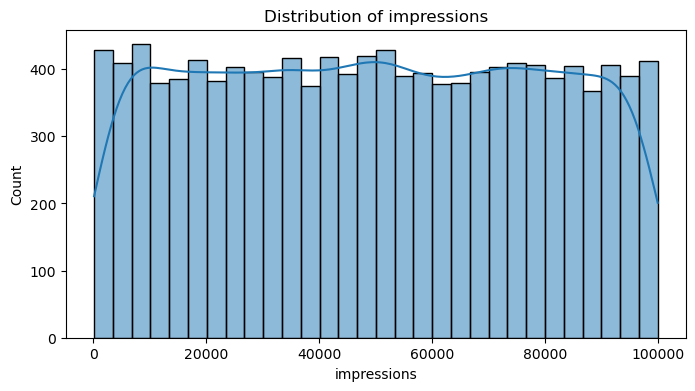

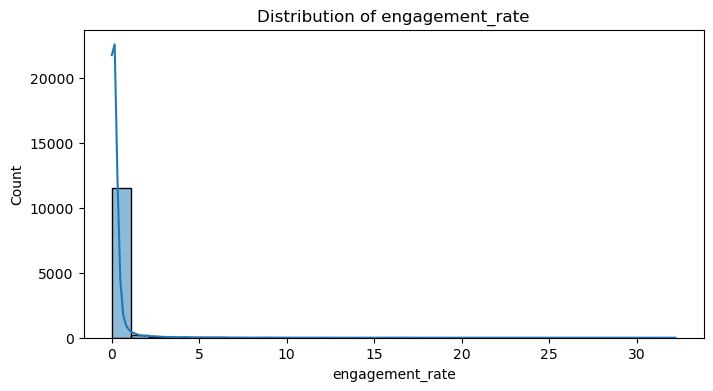

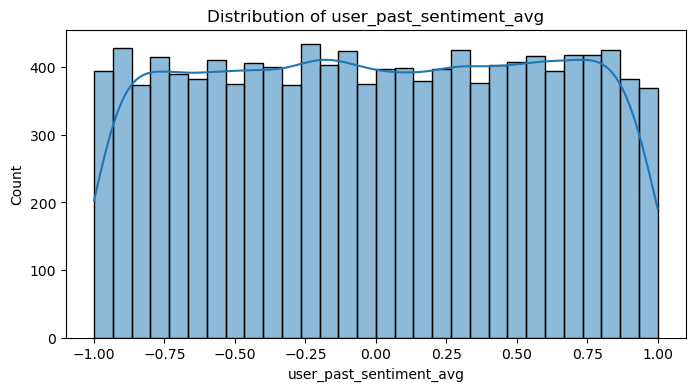

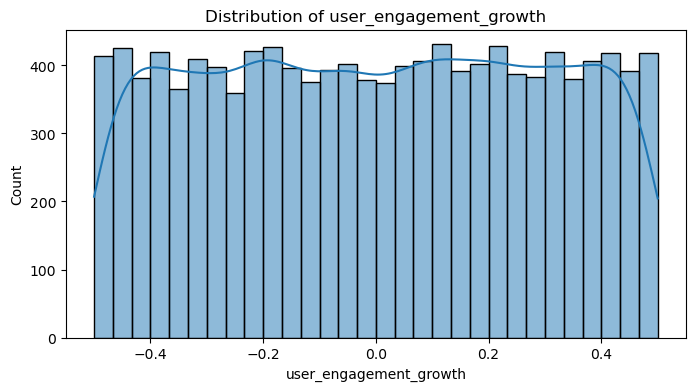

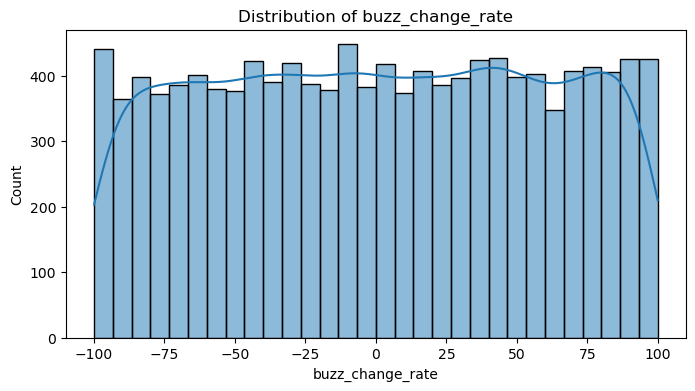

In [16]:
# Numerical Columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


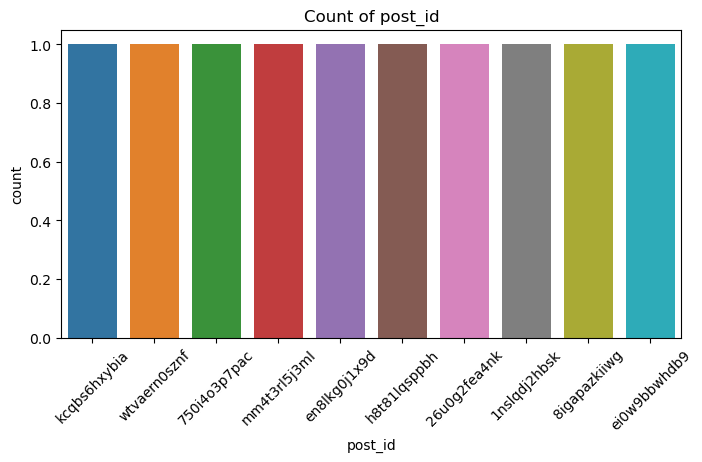

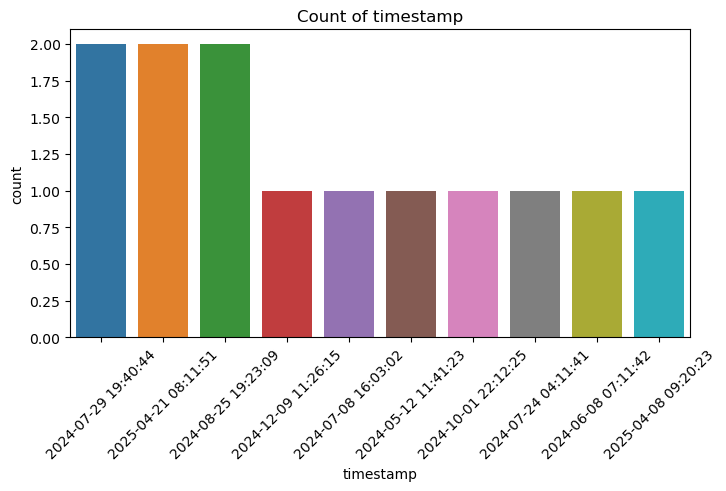

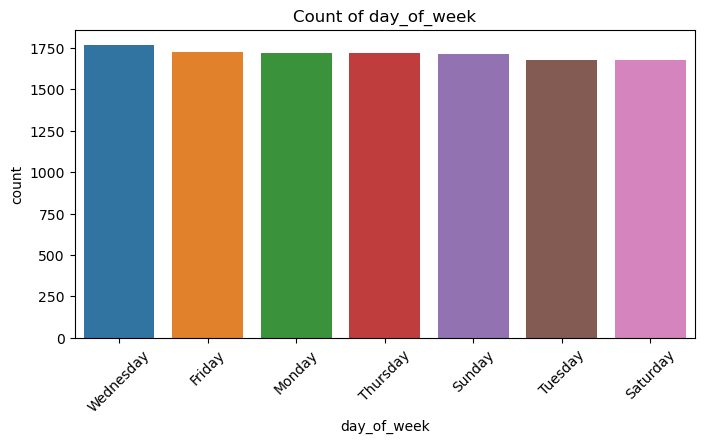

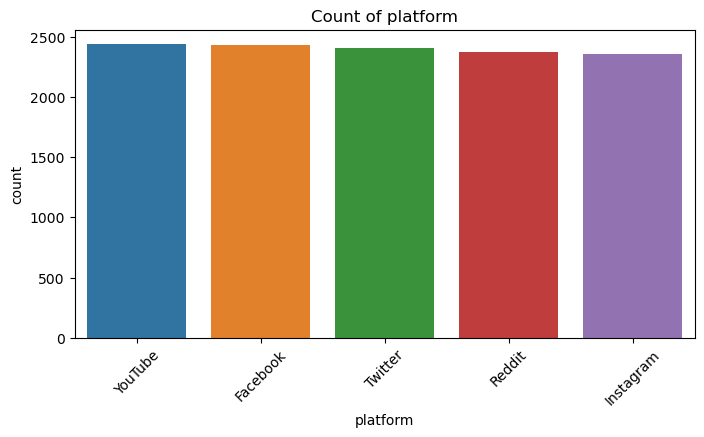

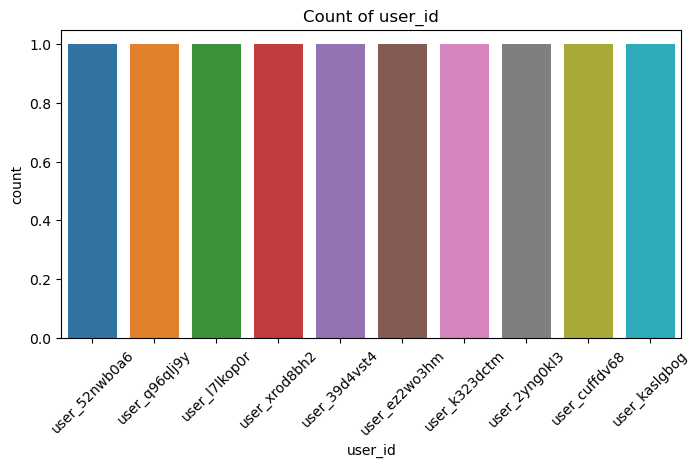

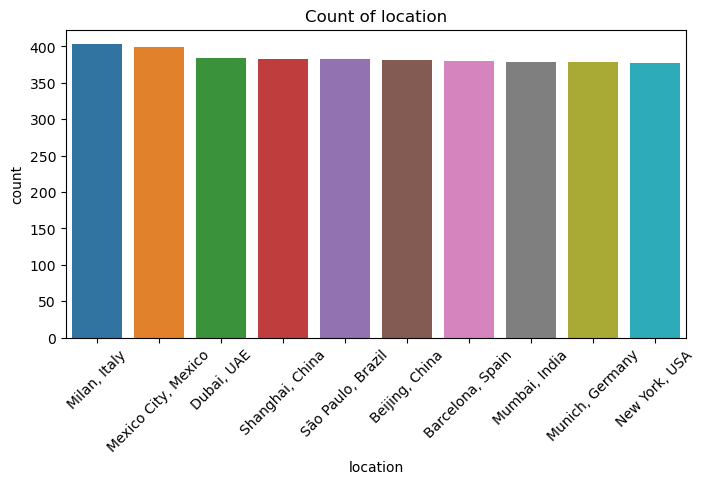

In [17]:
#Categorical  Columns


categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols[:6]:  # Show top 6
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()


## Bivariate Analysis

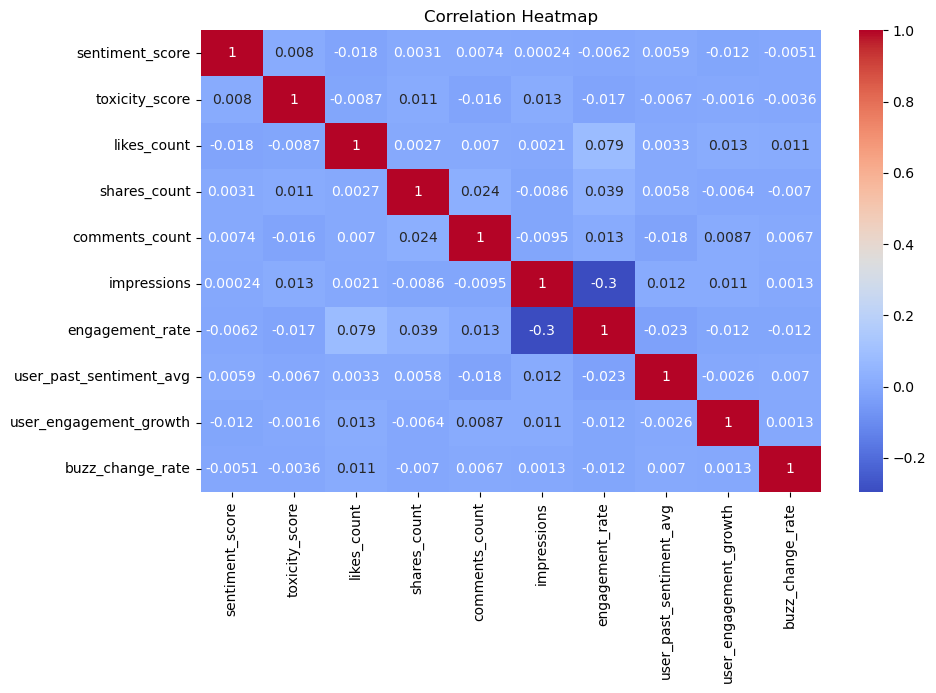

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


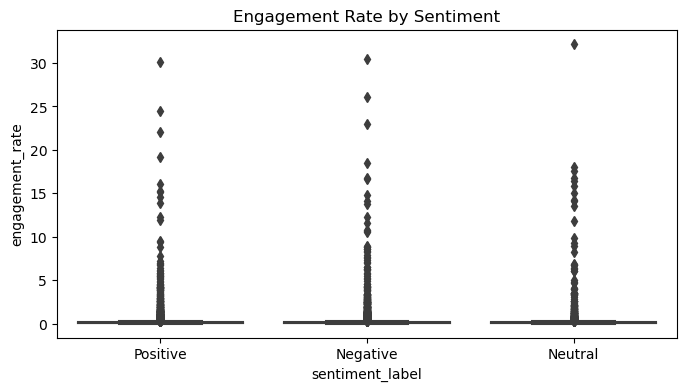

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sentiment_label', y='engagement_rate')
plt.title('Engagement Rate by Sentiment')
plt.show()


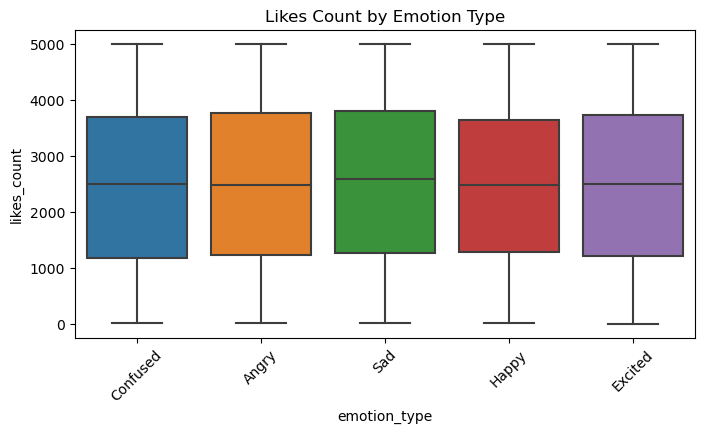

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='emotion_type', y='likes_count')
plt.title('Likes Count by Emotion Type')
plt.xticks(rotation=45)
plt.show()


In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour


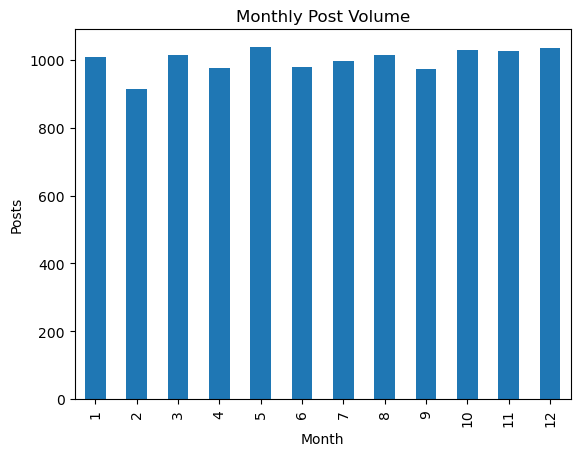

In [22]:
monthly_posts = df['month'].value_counts().sort_index()
monthly_posts.plot(kind='bar', title='Monthly Post Volume', xlabel='Month', ylabel='Posts')
plt.show()


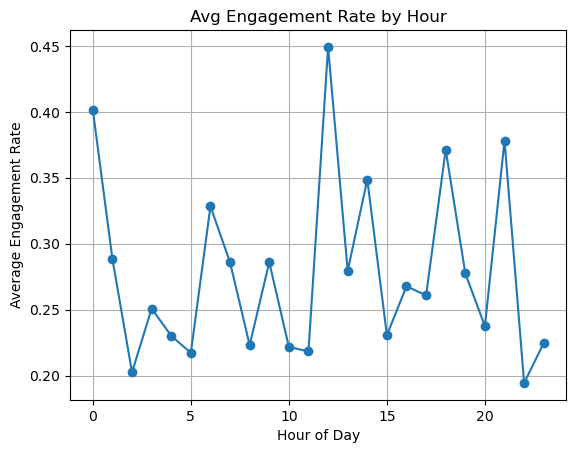

In [23]:
df.groupby('hour')['engagement_rate'].mean().plot(kind='line', title='Avg Engagement Rate by Hour', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement Rate')
plt.grid()
plt.show()


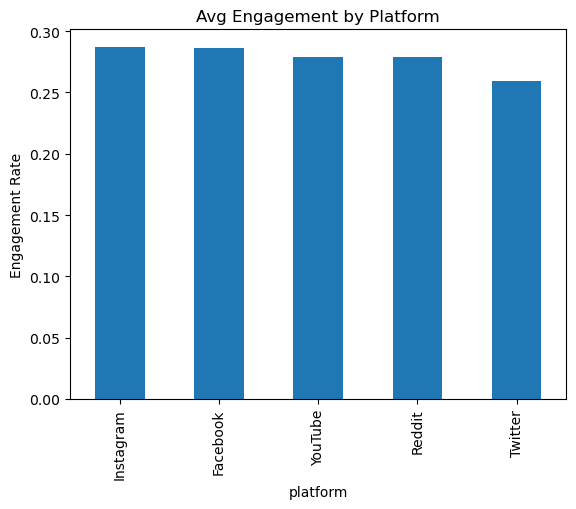

In [24]:
df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False).plot(kind='bar', title='Avg Engagement by Platform')
plt.ylabel('Engagement Rate')
plt.show()


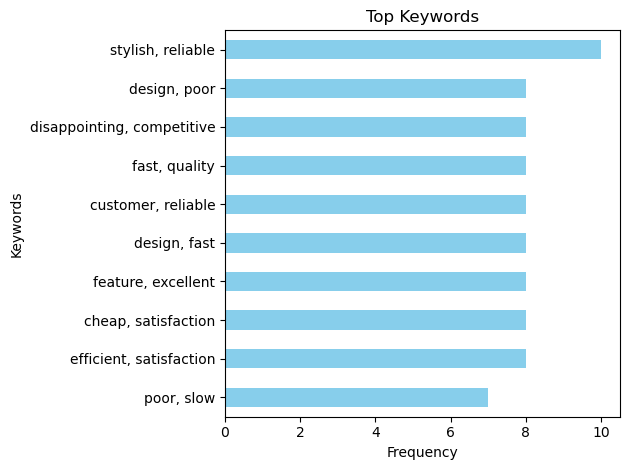

In [25]:
top_keywords = df['keywords'].value_counts().head(10).sort_values(ascending=True)  # sort for barh bottom-to-top
top_keywords.plot(kind='barh', title='Top Keywords', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()


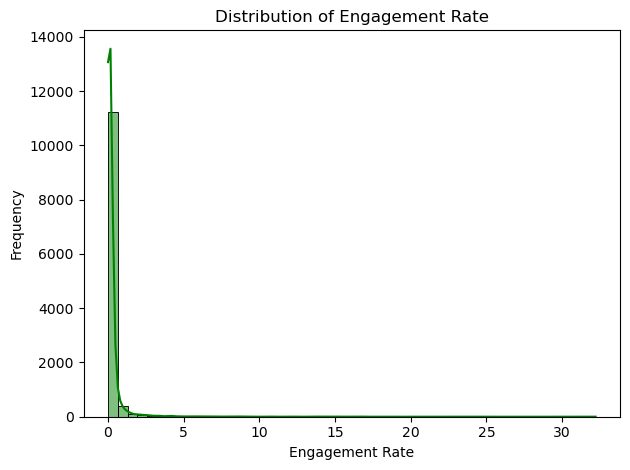

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['engagement_rate'], bins=50, kde=True, color='green')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


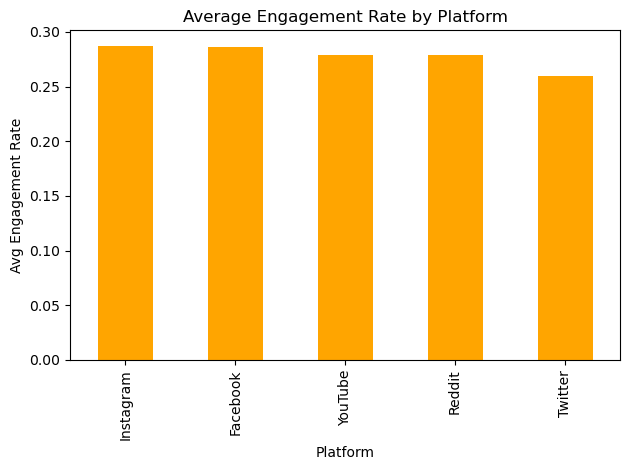

In [27]:
df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Engagement Rate by Platform')
plt.ylabel('Avg Engagement Rate')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


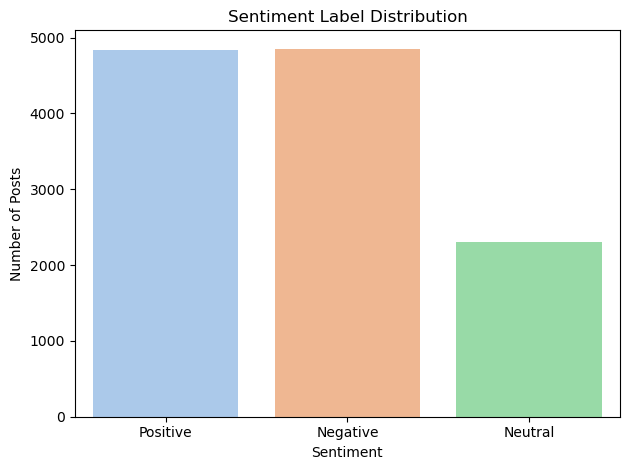

In [28]:
sns.countplot(data=df, x='sentiment_label', palette='pastel')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


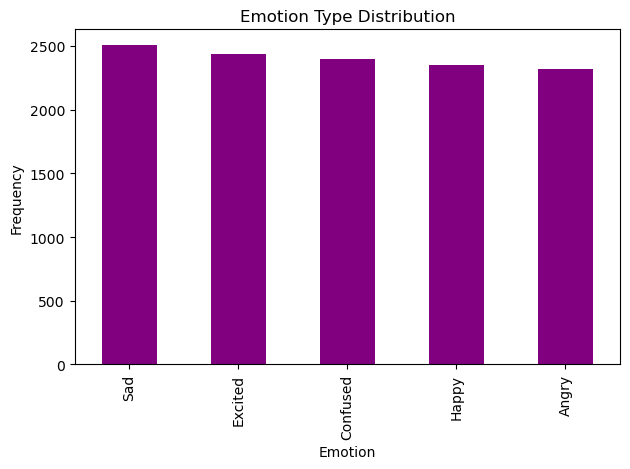

In [29]:
df['emotion_type'].value_counts().plot(kind='bar', color='purple')
plt.title('Emotion Type Distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


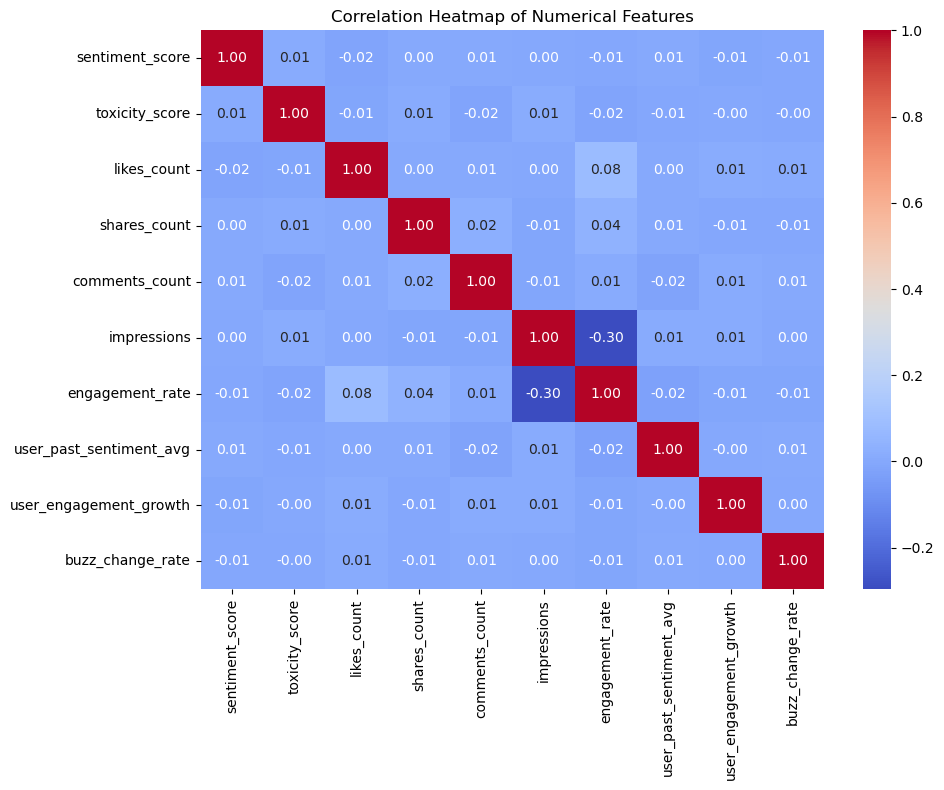

In [30]:
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


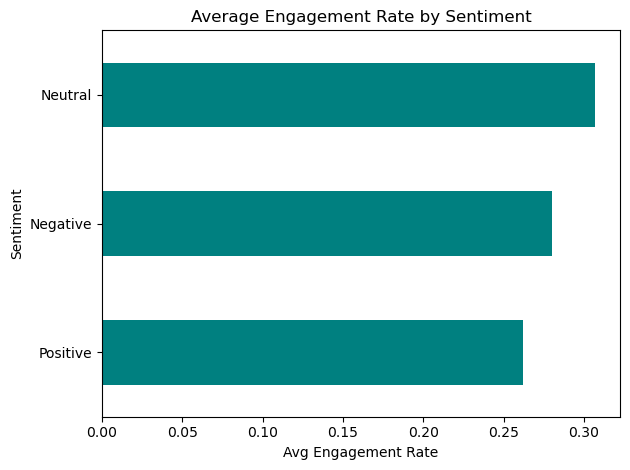

In [31]:
df.groupby('sentiment_label')['engagement_rate'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Engagement Rate by Sentiment')
plt.xlabel('Avg Engagement Rate')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()


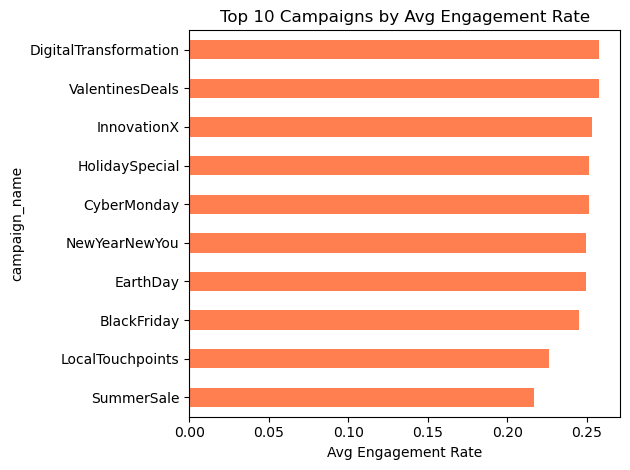

In [32]:
top_campaigns = df.groupby('campaign_name')['engagement_rate'].mean().sort_values(ascending=True).head(10)
top_campaigns.plot(kind='barh', color='coral')
plt.title('Top 10 Campaigns by Avg Engagement Rate')
plt.xlabel('Avg Engagement Rate')
plt.tight_layout()
plt.show()


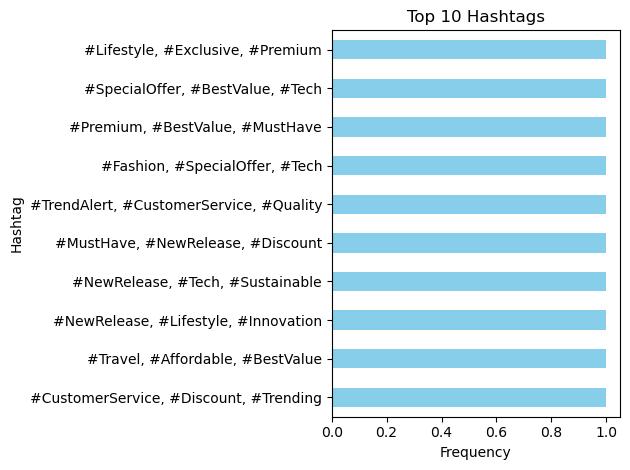

In [33]:

top_hashtags = df['hashtags'].value_counts().sort_values(ascending=True).head(10)

# Plotting
top_hashtags.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()


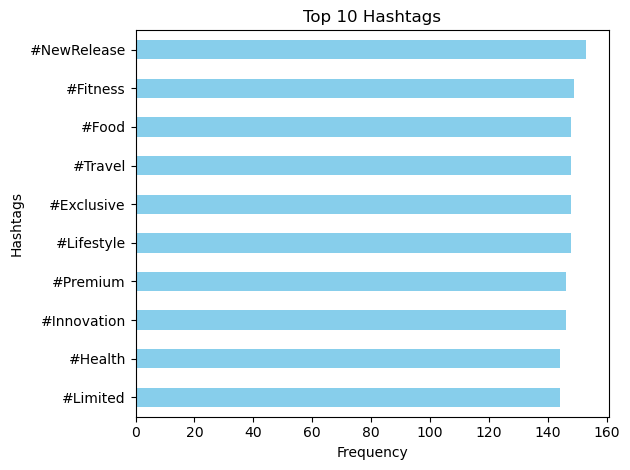

In [34]:
top_hashtags = df['hashtags'].value_counts().head(10)

# Plot
top_hashtags.plot(kind='barh', color='skyblue')
plt.title('Top 10 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


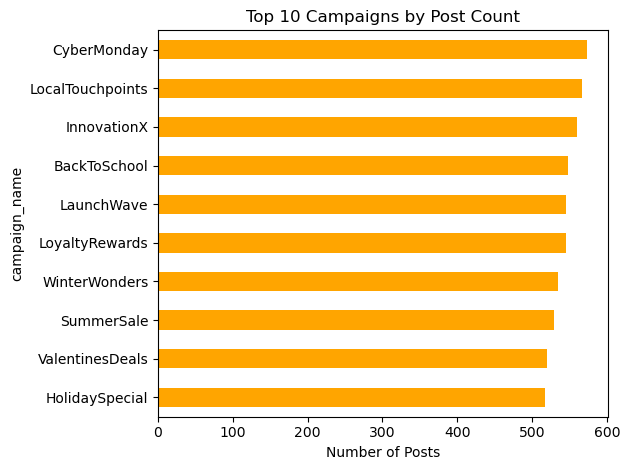

In [35]:
top_campaigns = df['campaign_name'].value_counts().head(10)
top_campaigns.plot(kind='barh', color='orange')
plt.title('Top 10 Campaigns by Post Count')
plt.xlabel('Number of Posts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


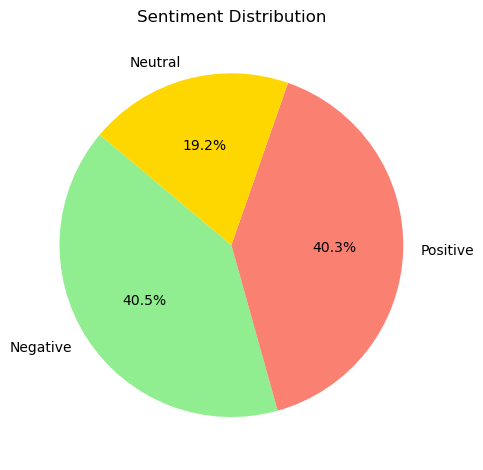

In [36]:
df['sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon', 'gold'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [37]:
top_posts = df[['post_id', 'engagement_rate']].sort_values(by='engagement_rate', ascending=False).head(10)
print(top_posts)


            post_id  engagement_rate
2880   67d6fsv09zzv         32.21171
11926  h03dprdsxb4t         30.43209
719    u50pnlesq1y8         30.04375
10917  h4btj68pyn9j         26.08163
7967   k508grdqqbne         24.50409
8908   968x1v2kj2ew         22.96326
11995  vpqni584supc         22.08636
3399   3wrr5osp1d7v         19.22181
3625   8q4ow39u8k75         18.49729
635    o9wkptky24wz         17.99230


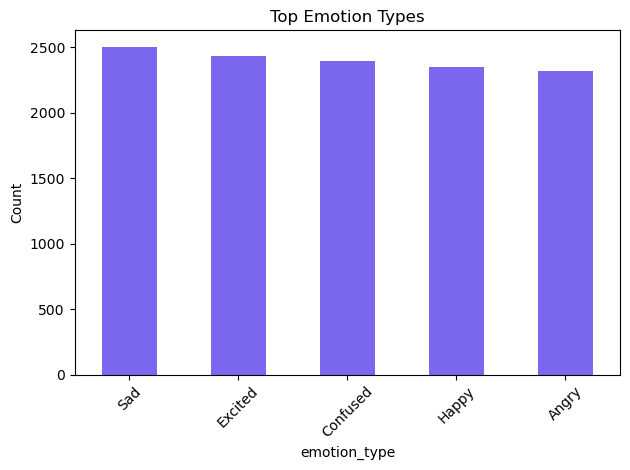

In [38]:
df['emotion_type'].value_counts().head(10).plot(kind='bar', color='mediumslateblue')
plt.title('Top Emotion Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


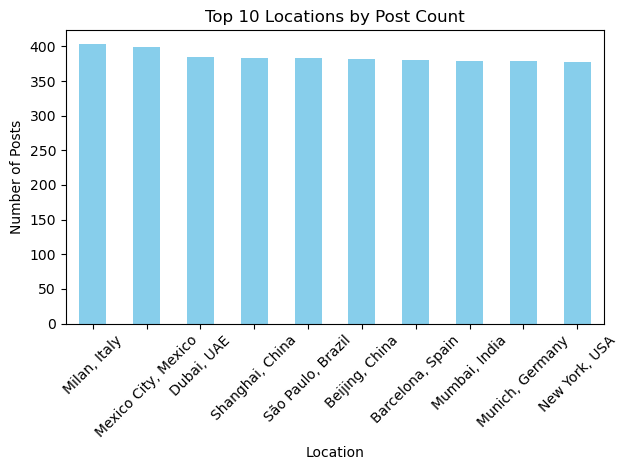

In [39]:
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Post Count')
plt.xlabel('Location')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


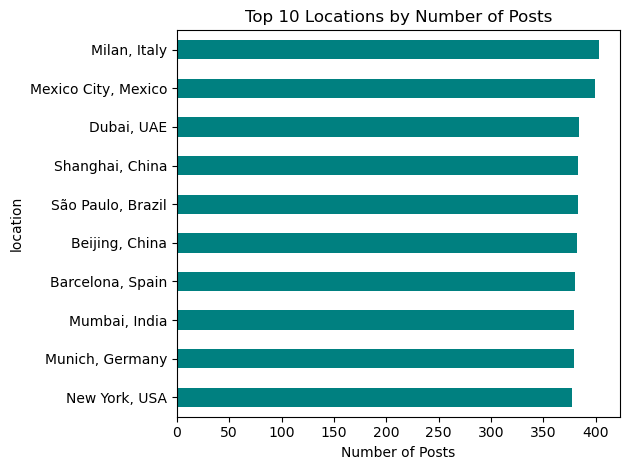

In [40]:
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='barh', color='teal')
plt.title('Top 10 Locations by Number of Posts')
plt.xlabel('Number of Posts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


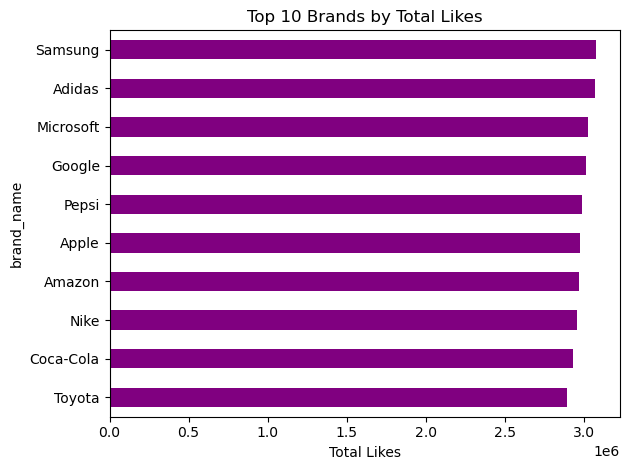

In [41]:
top_brands_likes = df.groupby('brand_name')['likes_count'].sum().sort_values(ascending=False).head(10)
top_brands_likes.plot(kind='barh', color='purple')
plt.title('Top 10 Brands by Total Likes')
plt.xlabel('Total Likes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


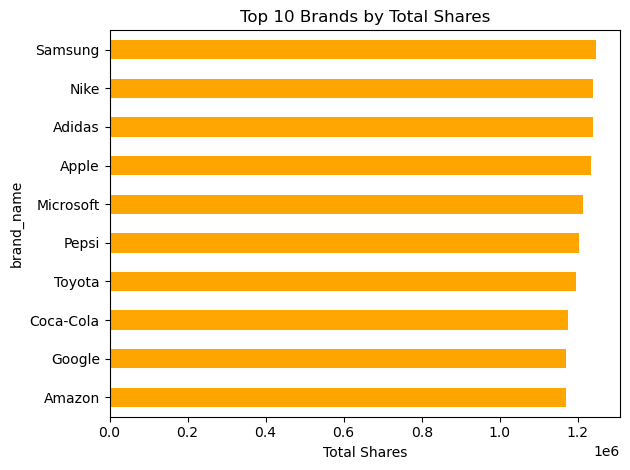

In [42]:
top_brands_shares = df.groupby('brand_name')['shares_count'].sum().sort_values(ascending=False).head(10)
top_brands_shares.plot(kind='barh', color='orange')
plt.title('Top 10 Brands by Total Shares')
plt.xlabel('Total Shares')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


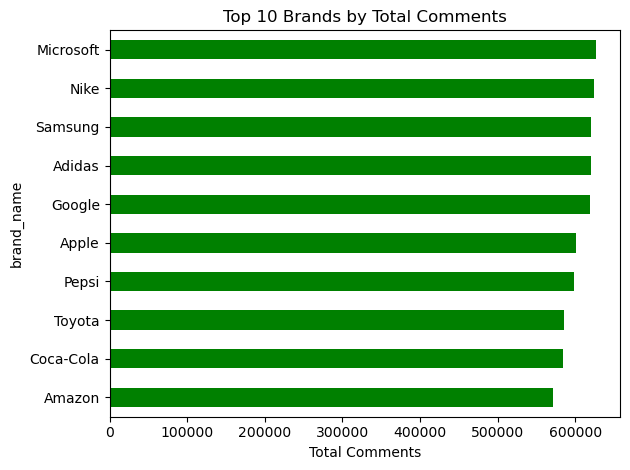

In [43]:
top_brands_comments = df.groupby('brand_name')['comments_count'].sum().sort_values(ascending=False).head(10)
top_brands_comments.plot(kind='barh', color='green')
plt.title('Top 10 Brands by Total Comments')
plt.xlabel('Total Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


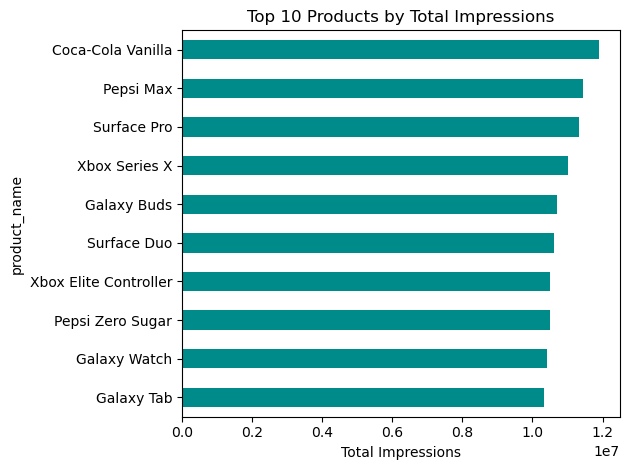

In [44]:
top_products_impressions = df.groupby('product_name')['impressions'].sum().sort_values(ascending=False).head(10)
top_products_impressions.plot(kind='barh', color='darkcyan')
plt.title('Top 10 Products by Total Impressions')
plt.xlabel('Total Impressions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


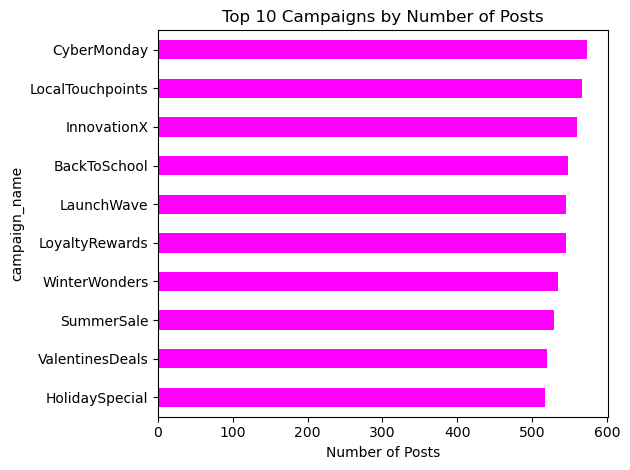

In [45]:
top_campaigns = df['campaign_name'].value_counts().head(10)
top_campaigns.plot(kind='barh', color='magenta')
plt.title('Top 10 Campaigns by Number of Posts')
plt.xlabel('Number of Posts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


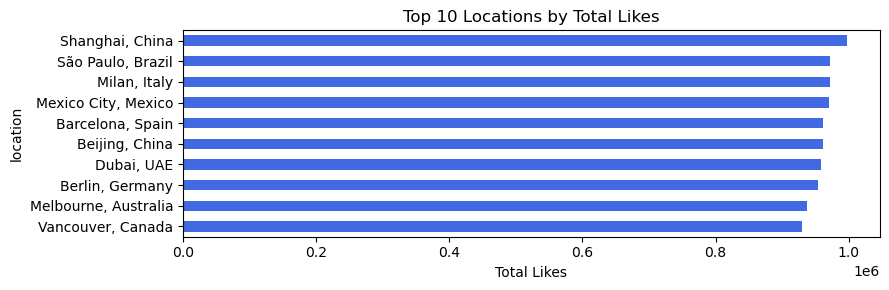

In [46]:
plt.figure(figsize=(9, 3))
top_locations_likes = df.groupby('location')['likes_count'].sum().sort_values(ascending=False).head(10)
top_locations_likes.plot(kind='barh', color='royalblue')
plt.title('Top 10 Locations by Total Likes')
plt.xlabel('Total Likes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


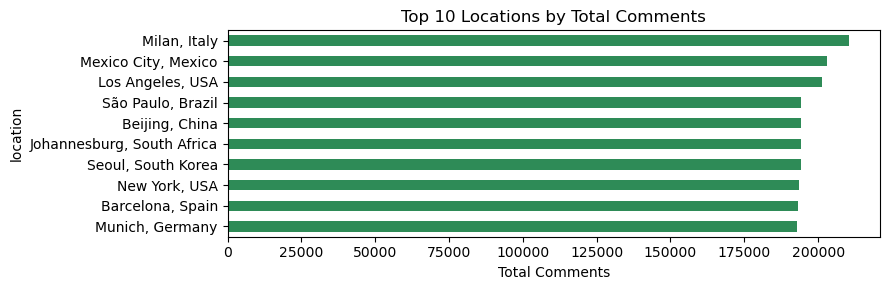

In [47]:
plt.figure(figsize=(9, 3))
top_locations_comments = df.groupby('location')['comments_count'].sum().sort_values(ascending=False).head(10)
top_locations_comments.plot(kind='barh', color='seagreen')
plt.title('Top 10 Locations by Total Comments')
plt.xlabel('Total Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


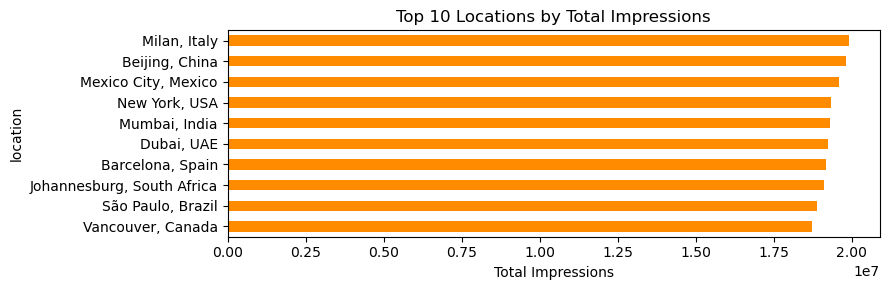

In [48]:
plt.figure(figsize=(9, 3))
top_locations_impressions = df.groupby('location')['impressions'].sum().sort_values(ascending=False).head(10)
top_locations_impressions.plot(kind='barh', color='darkorange')
plt.title('Top 10 Locations by Total Impressions')
plt.xlabel('Total Impressions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [49]:
top_likes = df[['post_id', 'likes_count']].sort_values(by='likes_count', ascending=False).head(10)
print("Top 10 Posts by Likes:")
print(top_likes)


Top 10 Posts by Likes:
            post_id  likes_count
1166   87gq6xrd3ykv         5000
8459   d3rmd137wehn         5000
11858  a3vh0wesnhg2         5000
11766  fvvna7s3i8o9         5000
6947   qgzkmn6gh31d         4999
6120   sha7t764lt9t         4999
1945   yhxvwx8u4gqk         4999
6170   krs5f8l99s3m         4998
11059  dfjuykszr588         4998
2590   4up2ql57io9r         4997


In [50]:
top_shares = df[['post_id', 'shares_count']].sort_values(by='shares_count', ascending=False).head(10)
print("Top 10 Posts by Shares:")
print(top_shares)


Top 10 Posts by Shares:
            post_id  shares_count
7928   wawuzgytmd76          2000
202    euvr0r10wrj6          2000
3691   fbkrqxjkbfyl          2000
5382   yu24m2btljaj          1999
5000   s9ennlodwowm          1999
11457  oiszojqm6qnn          1999
5838   2xcg9ld7du67          1999
7071   qq86lkjrfzlt          1999
2754   vzdc847hov6u          1998
9018   ne28w983w8p6          1998


In [51]:
top_comments = df[['post_id', 'comments_count']].sort_values(by='comments_count', ascending=False).head(10)
print("Top 10 Posts by Comments:")
print(top_comments)


Top 10 Posts by Comments:
            post_id  comments_count
2836   x9vyodex8s09            1000
499    udarxdsrykr5            1000
3291   pr7v9tbxo3td            1000
9799   r7whbtbia4vr            1000
9059   z2lp522fyre5            1000
10821  cd65aqs67yse            1000
8033   6mdlugkjtgmh            1000
194    6viq2n7poav6            1000
6698   wsse413uz3hi            1000
2814   xoistx7gh5xw            1000


In [52]:
top_impressions = df[['post_id', 'impressions']].sort_values(by='impressions', ascending=False).head(10)
print("Top 10 Posts by Impressions:")
print(top_impressions)


Top 10 Posts by Impressions:
            post_id  impressions
8182   eh0nc8mgoer4        99997
8936   7h2uba61bhiq        99970
9262   vwb0u9ta39wm        99970
7080   e0cxigmtz1aj        99964
9659   tych2ncsrc0v        99964
6217   jpgqf6h1xiny        99959
11611  x8m54xeznypo        99957
7422   tvhpeuf8wj4q        99955
3451   8qx0tmt573up        99945
1238   cb07umibgndy        99922


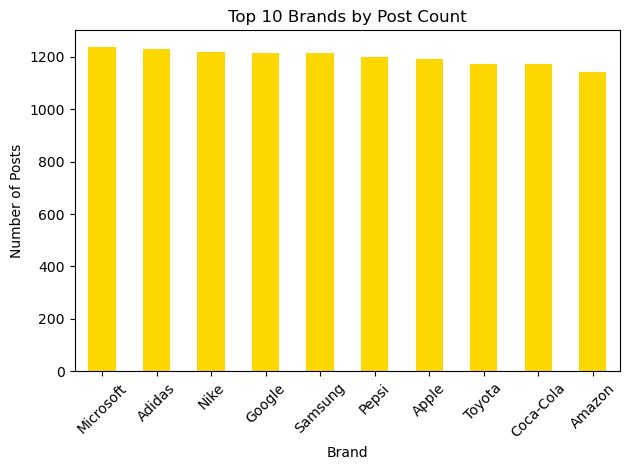

In [53]:
top_brands = df['brand_name'].value_counts().head(10)
top_brands.plot(kind='bar', color='gold')
plt.title('Top 10 Brands by Post Count')
plt.xlabel('Brand')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


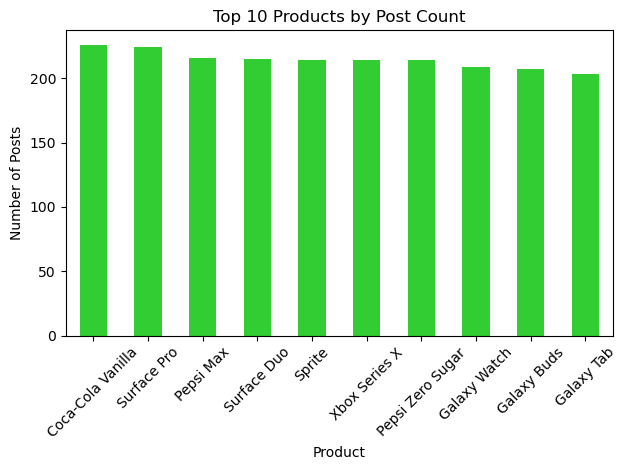

In [54]:
top_products = df['product_name'].value_counts().head(10)
top_products.plot(kind='bar', color='limegreen')
plt.title('Top 10 Products by Post Count')
plt.xlabel('Product')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


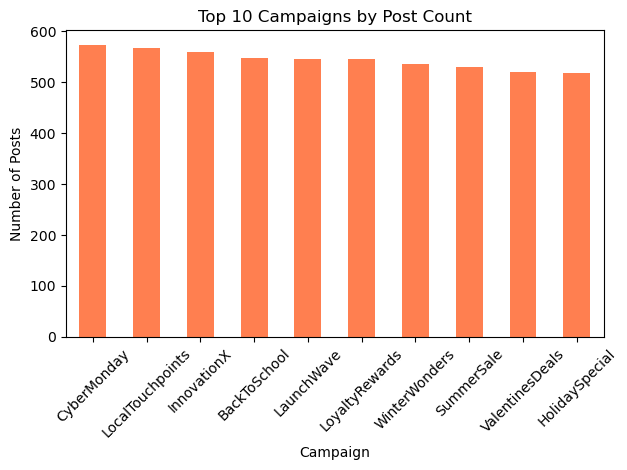

In [55]:
top_campaigns = df['campaign_name'].value_counts().head(10)
top_campaigns.plot(kind='bar', color='coral')
plt.title('Top 10 Campaigns by Post Count')
plt.xlabel('Campaign')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
